# Data Wizard

### Final Project Rakamin - Airlines Customer Satisfaction

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.1
pandas version :  1.1.3
seaborn version :  0.11.0


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use('default')

In [3]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

# Load and Describe Data

## Load Data

In [4]:
data = pd.read_csv('Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Describe Data

In [5]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

Info dataframe:
* Dataframe memiliki total 129880 baris dan 22 kolom
* Dataframe masih memiliki *null* values di kolom `Arrival Delay in Minutes`
* Target klasifikasi adalah kolom `satisfaction` dengan tipe data `object`
* Berarti sisanya adalah *feature*

Karena target `satiscation` masih berupa `object` maka data selanjutnya dirubah menjadi `int64`

In [7]:
data['satisfaction'].replace(('satisfied', 'dissatisfied'), (1, 0), inplace=True)

In [8]:
cats = ['Gender','Customer Type','Type of Travel','Class']
nums = ['satisfaction','Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']


In [9]:
data.sample(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
23254,0,Male,Loyal Customer,57,Personal Travel,Eco,1814,3,3,3,...,4,4,4,5,4,1,4,4,0,8.0
97372,1,Female,Loyal Customer,21,Business travel,Business,2491,5,5,5,...,4,4,4,2,4,4,4,4,0,0.0
123353,1,Female,Loyal Customer,44,Business travel,Business,460,5,5,5,...,3,5,5,5,5,5,5,5,0,0.0
65128,1,Male,Loyal Customer,23,Business travel,Business,2938,0,4,0,...,4,4,5,5,5,4,5,4,2,0.0
106136,1,Male,Loyal Customer,35,Business travel,Eco,1653,4,4,4,...,4,4,2,5,5,1,1,4,0,0.0
75886,0,Male,Loyal Customer,33,Business travel,Business,3051,2,4,4,...,2,2,3,5,3,2,3,2,0,0.0
83238,0,Female,Loyal Customer,67,Business travel,Business,3394,3,3,3,...,2,3,3,3,3,1,3,4,3,2.0
83716,0,Male,Loyal Customer,31,Business travel,Eco Plus,2226,3,4,4,...,3,3,4,2,3,4,4,3,16,32.0
24142,1,Female,Loyal Customer,52,Personal Travel,Eco Plus,261,5,5,4,...,4,5,5,5,5,3,5,4,34,61.0
54681,0,Male,disloyal Customer,28,Business travel,Eco,2291,3,3,3,...,5,3,4,4,1,1,3,3,2,0.0


- Tidak ada kolom yang memberikan unique keys bagi tiap baris
- Kolom `satisfaction` merupakan hasil akhir dari kepuasan pelanggan
- Kolom `Seat Comfort`, `Departure/Arrival time convenient`, `Food and drink`, `Gate location`, `Inflight wifi service`,`Inflight entertainment`,`Online support`,`Ease of Online booking`,`Onboard service`,`Leg room service`,`Baggage handling`,`Checkin service`,`Cleanliness`,`Online boarding` adalah service yang dinilai oleh pelanggan
- Kolom `Departure Delay in Minutes`,`Arrival Delay in Minutes` adalah indikator lain yang dapat menilai performa maskapai dalam melayani pelanggannya

In [10]:
data[nums].describe()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,0.547328,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,0.497757,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `Departure/Arrival time convenient` dan `Gate location` terlihat normal (*mean* dan *median* sama nilainya)
* Kolom  `Departure Delay in Minutes` dan `Arrival Delay in Minutes` memiliki nilai median dan mean yang cukup jauh, menandakan distribusi yang tidak normal

In [11]:
data[cats].describe()

,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,65899,106100,89693,62160


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Semua kolom Categotical memiliki unique value yang sama kecuali `class`

### Value Counting

In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Gender:
Female    65899
Male      63981
Name: Gender, dtype: int64

Value count kolom Customer Type:
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

Value count kolom Type of Travel:
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

Value count kolom Class:
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64



## Univariate Analysis

### Box plots

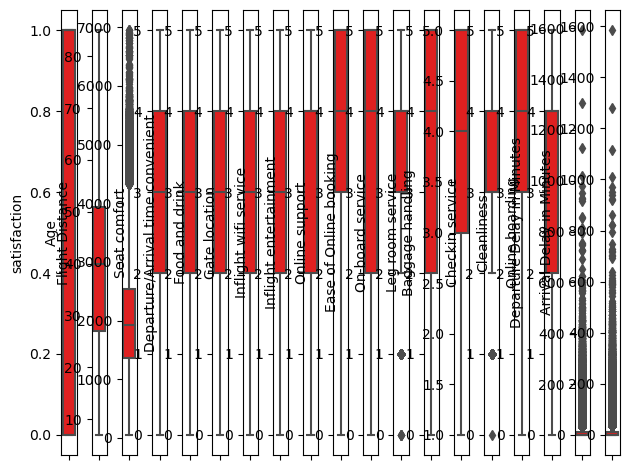

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='red', orient='v')
    plt.tight_layout()

Keberadaan outlier.
* Outlier terlihat utamanya pada kolom `Flight Distance`,`Departure Delay in Minutes`&`Arrival Delay in Minutes`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `Departure Delay in Minutes`, `Distance`, `Arrival Delay in Minutes`

### Dist plots

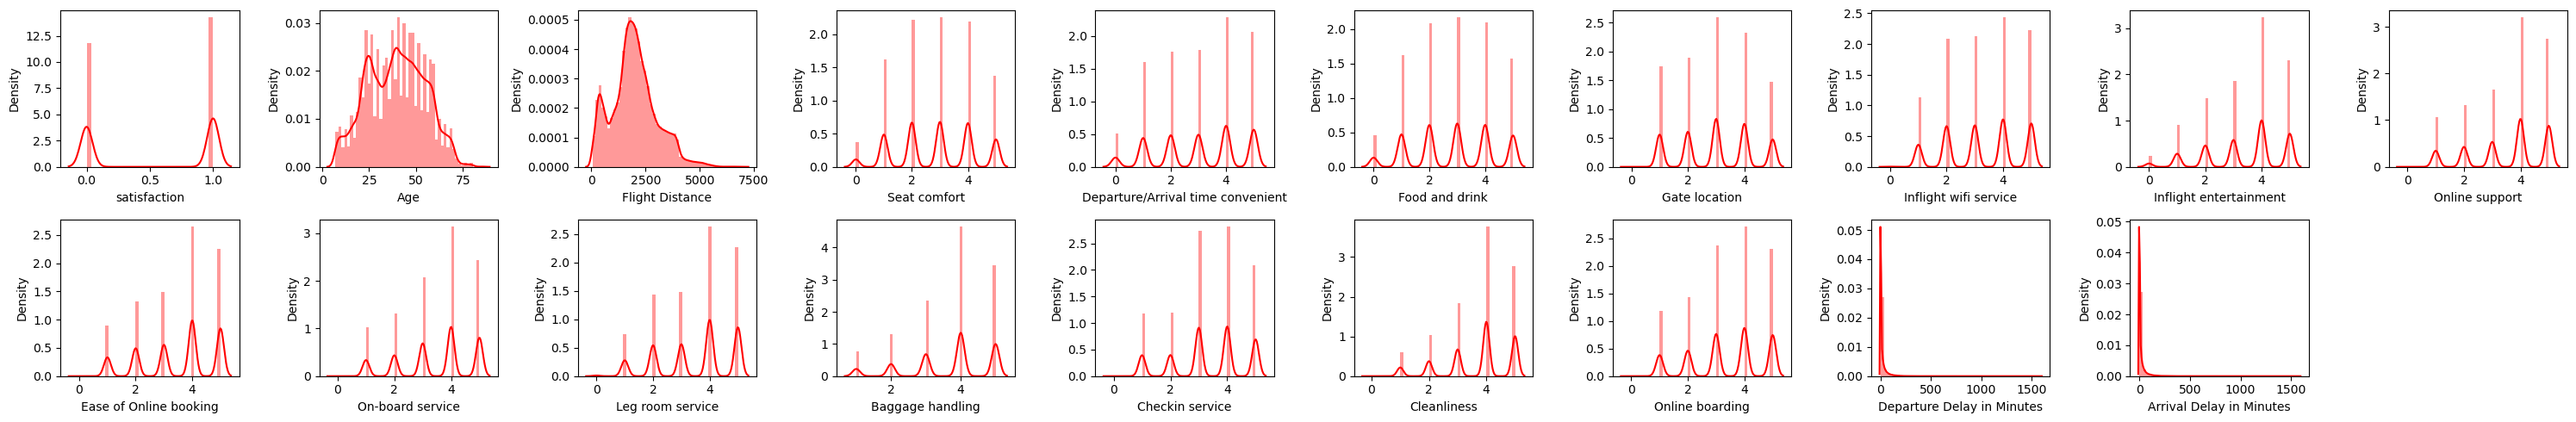

In [14]:
plt.figure(figsize=(30, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.distplot(data[nums[i]], color='red')
    plt.tight_layout()

Kolom `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` skewed ke kanan seperti perkiraan.

## Multivariate Analysis

### Correlation heatmap

<AxesSubplot:>

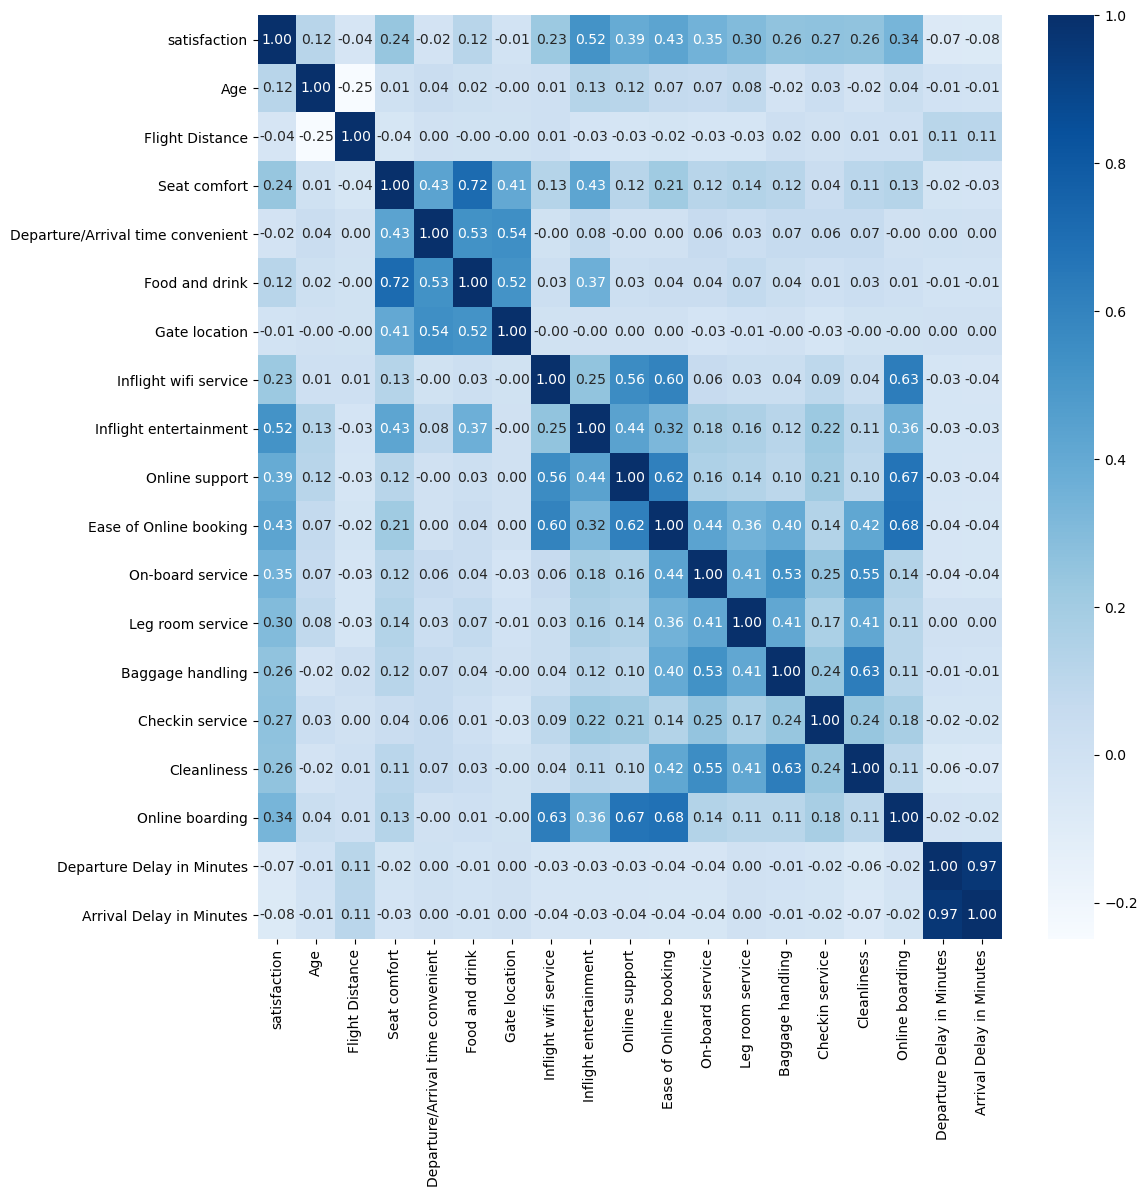

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target `satisfaction` memiliki korelasi positif `Age`,`Seat Comfort`, `Food and drink`, `Inflight wifi service`,`Inflight entertainment`,`Online support`,`Ease of Online booking`,`Onboard service`,`Leg room service`,`Baggage handling`,`Checkin service`,`Cleanliness`,`Online boarding`
* Target memiliki korelasi negatif dengan `Flight Distance`,`Departure Time/Arrival Time Convenient`,`Gate Location`,`Departure Delay in Minutes`,`Arrival Delay in Minutes`
* `Departure Delay in Minutes` juga memiliki korelasi positif kuat dengan `Arrival Delay in Minutes`. Ada kemungkinan kedua *feature* ini redundan

### Category plots

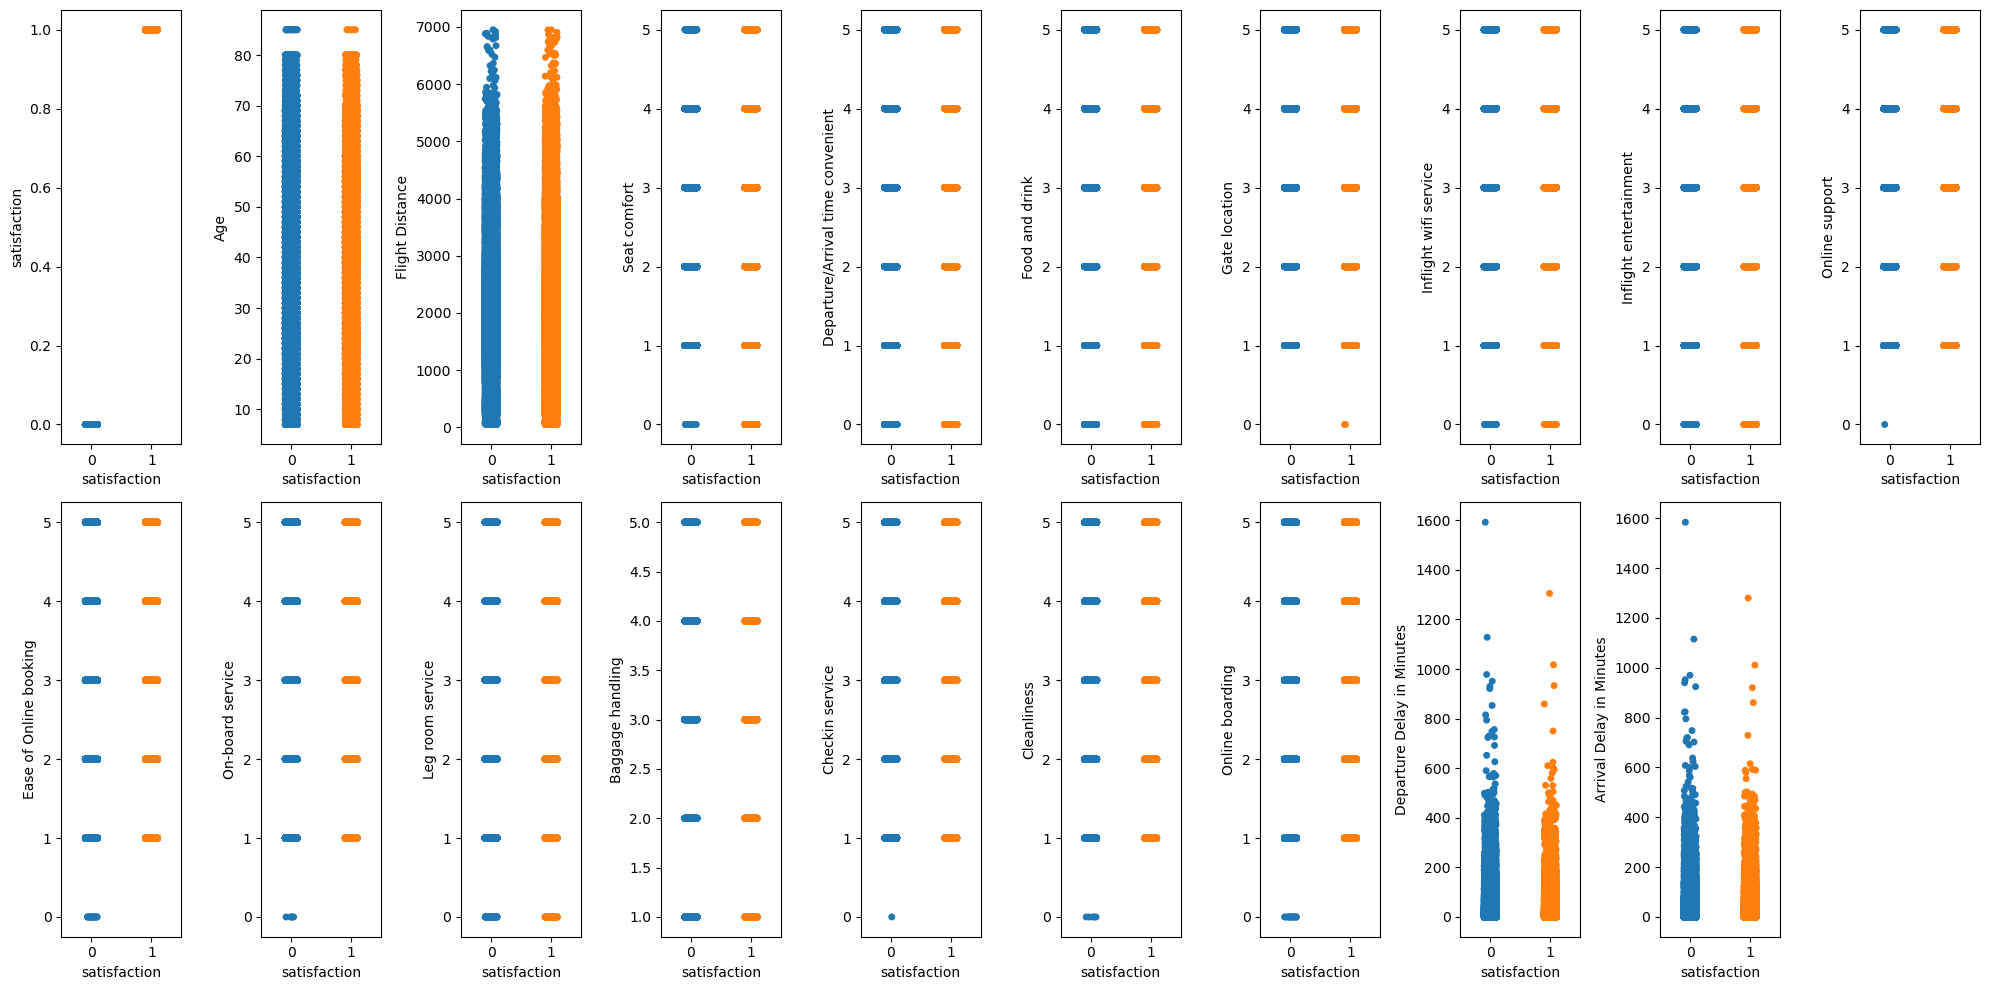

In [16]:
fig = plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    ax = fig.add_subplot(2, 10, i+1)
    sns.stripplot(ax=ax, data=data, x='satisfaction', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

# EDA, Insight & Visualization

## Distribusi Data

cek distribusi data featurenya

In [17]:
features = ['Age','Seat comfort','Food and drink','Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
           'On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']

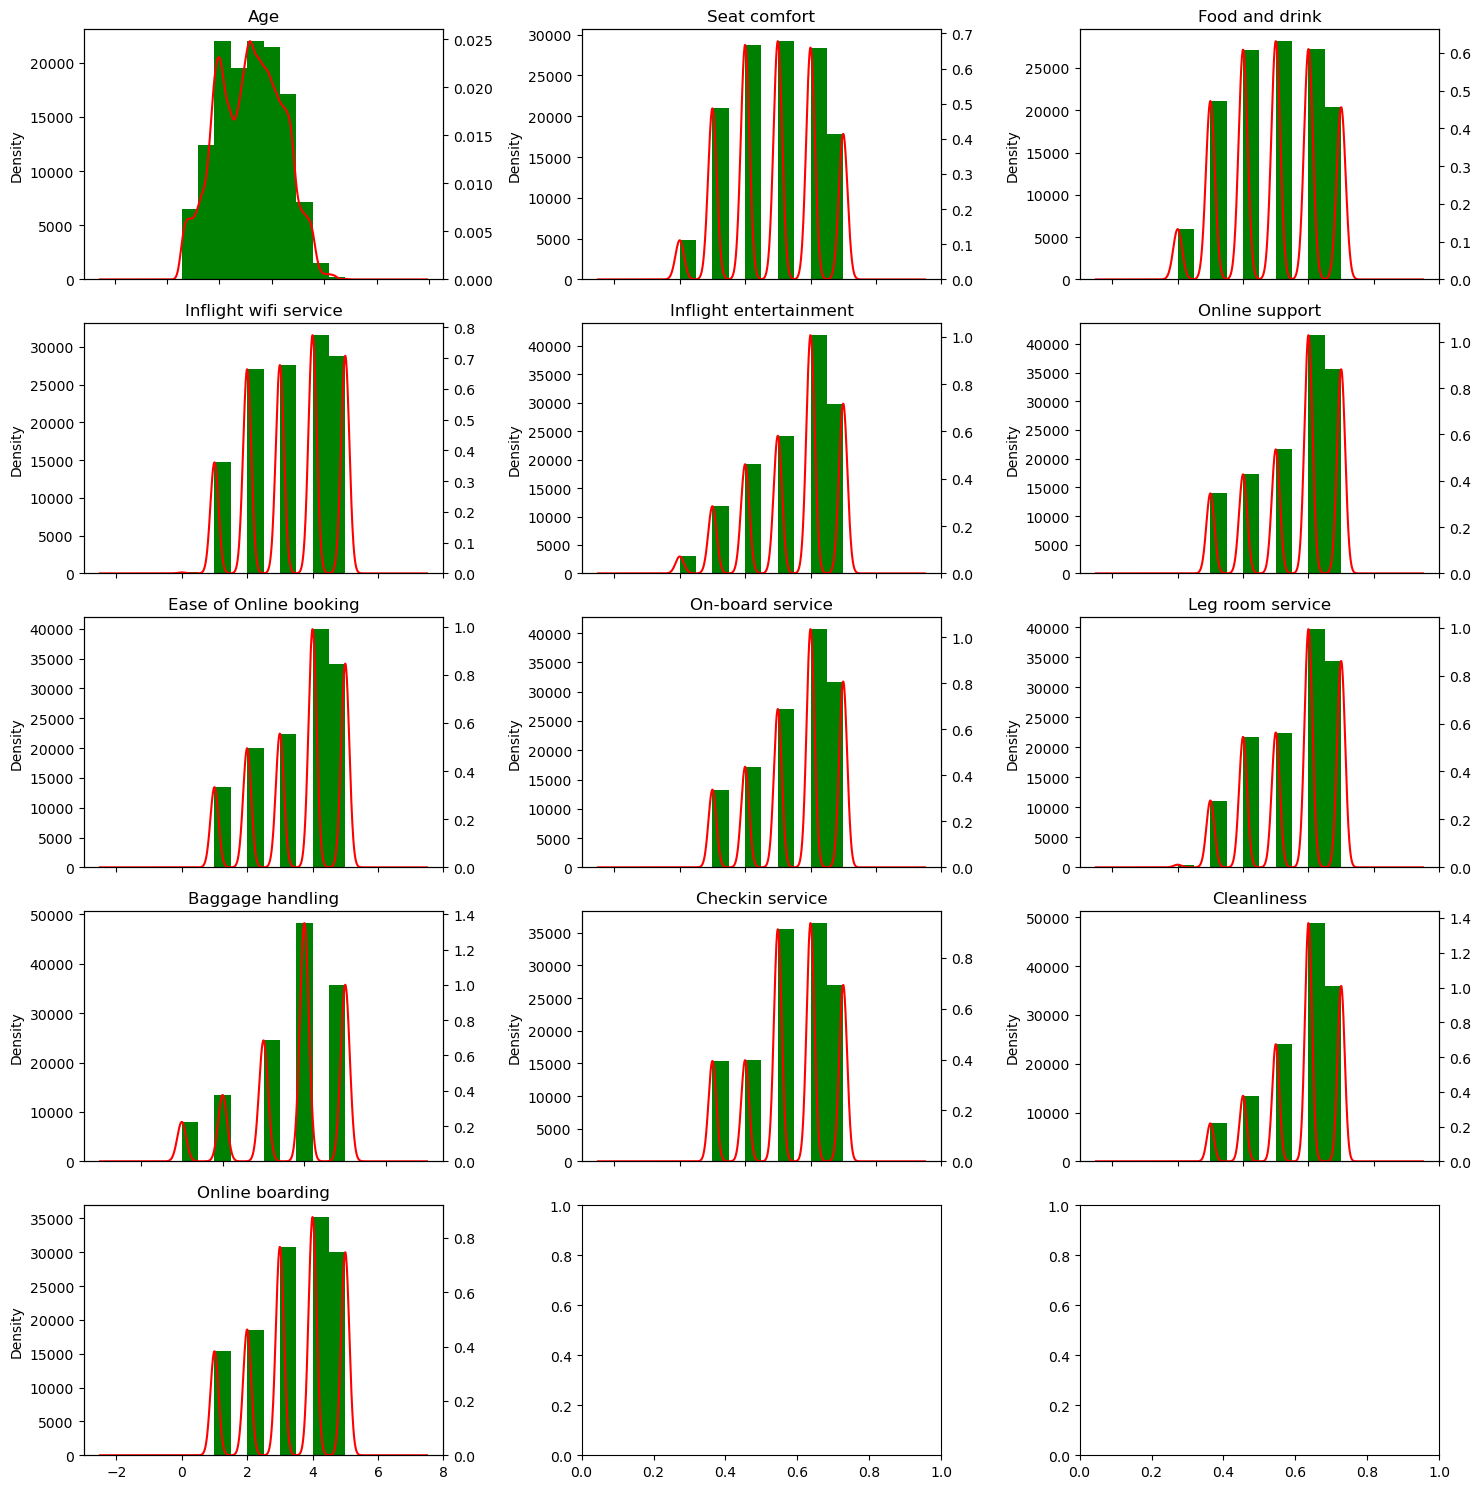

In [18]:
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()

## Barplot

In [19]:
from textwrap import wrap

In [20]:
data_copy = data.copy()

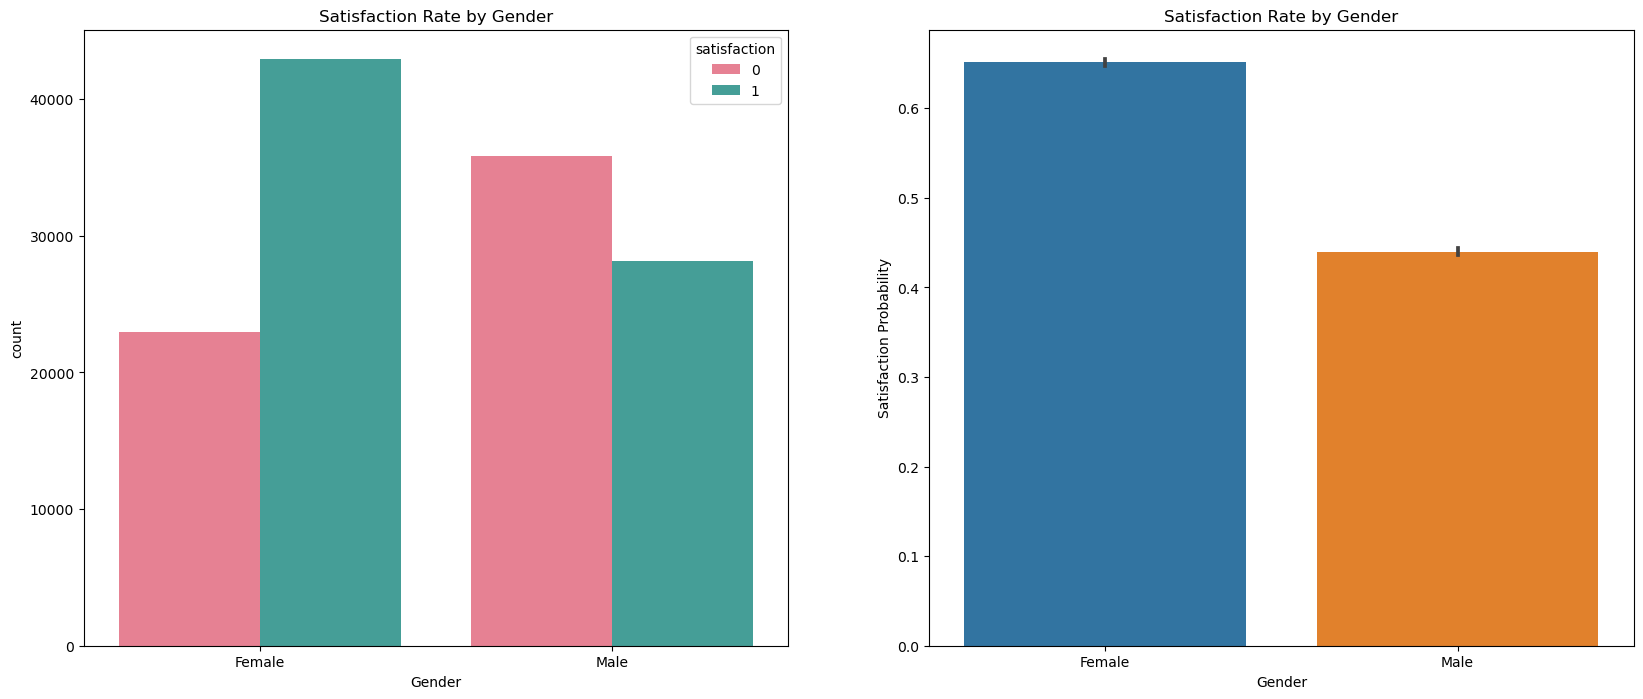

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
g = sns.countplot(x='Gender',hue='satisfaction',data=data,ax=ax1,palette='husl')
ax1.set_title('Satisfaction Rate by Gender')

g = sns.barplot(x="Gender",y="satisfaction",data=data, ax=ax2)
ax2.set_title('Satisfaction Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Satisfaction Probability');

dari data visual diatas, pelanggan kita dengan jenis kelamin perempuan lebih banyak yg puas dibandingkan dengan laki-laki. dan rate kepuasan pelanggan kita juga lebih banyak pada **perempuan** dibandingkan dengan **laki-laki**

In [22]:
dfg = data_copy.groupby(['Class'])['satisfaction'].mean().reset_index()
dfg.head()

,Class,satisfaction
0,Business,0.709379
1,Eco,0.393987
2,Eco Plus,0.427053


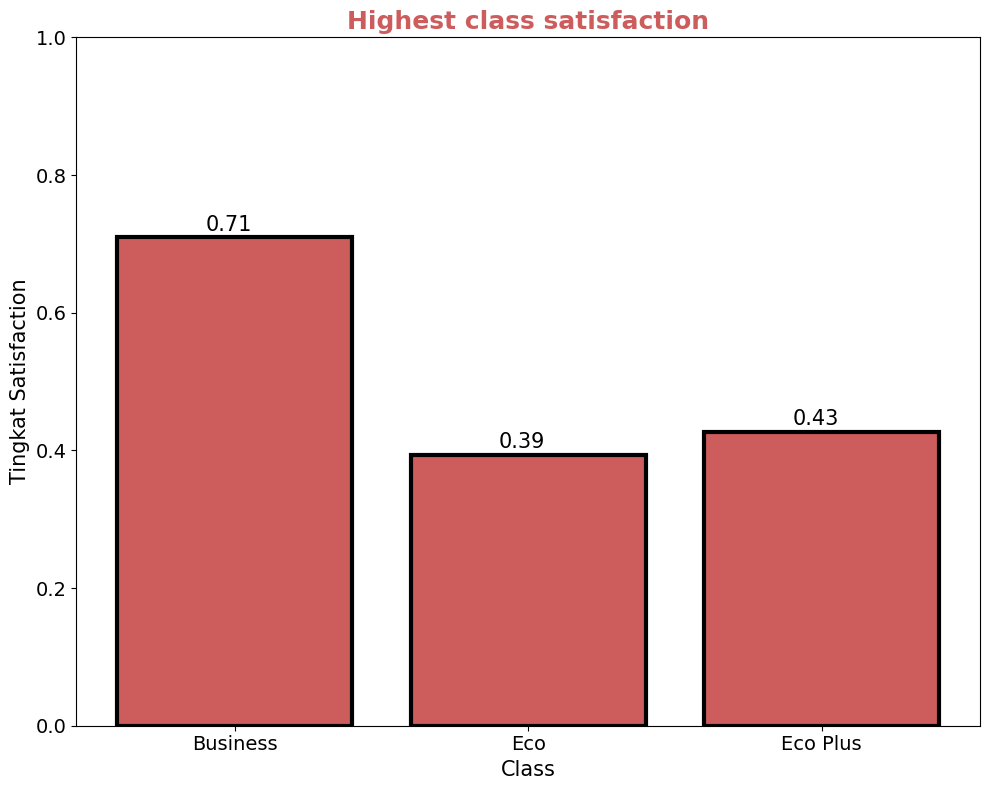

In [23]:
x = dfg['Class']
y = dfg['satisfaction']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('Highest class satisfaction',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Tingkat Satisfaction', fontsize=15) # y axis label
plt.xlabel('Class', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+0.01, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('Highest class satisfaction.png', tight_box=True)

Customer kita cenderung lebih puas pada pelayanan **class business** dengan nilai rata-rata **0.72**

## Group age by satisfaction

In [24]:
def age_group(x):
    if x['Age']<17:
        kategori = 'Child'
    elif x['Age'] >= 17 and x['Age'] <=30:
        kategori = 'Young Adults'
    elif x['Age'] >= 31 and x['Age'] <=45:
        kategori = 'Middle-aged Adults'  
    else:
        kategori = 'Old-aged Adults'
    return kategori

In [25]:
data['age_group'] = data.apply(lambda x: age_group(x), axis=1)
age_groupby = data.groupby(['age_group']).agg({'satisfaction':'mean'}).reset_index()
age_groupby.columns = ['age_group','satisfaction_rate']
age_groupby.head()

,age_group,satisfaction_rate
0,Child,0.426815
1,Middle-aged Adults,0.569138
2,Old-aged Adults,0.617177
3,Young Adults,0.448602


## Tingkat kepuasan berdasarkan service yang diberikan

Asumsi yang digunakan : Jika customer mengisi nilai 3-5 maka diasumsikan cenderung `Satisfied` terhadap service yang diberikan jika mengisi nilai 0-1 maka diasumsikan cenderung `Dissatisfied` terhadap service yang diberikan

In [26]:
data_copy = data.copy()

In [27]:
data_copy['age_group'].unique()

array(['Old-aged Adults', 'Child', 'Young Adults', 'Middle-aged Adults'],
      dtype=object)

In [28]:
data_copy['Passenger'] = 1

In [29]:
service = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','age_group','Passenger','Class']
data_copy[service] = data_copy[service].replace((0,1,2), 0)

In [30]:
data_copy[service] = data_copy[service].replace((3,4,5), 1)

In [31]:
dfg = data_copy[service] 

In [32]:
dfg['Passenger'] = 1

In [33]:
dfg.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,age_group,Passenger,Class
0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,Old-aged Adults,1,Eco
1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,Old-aged Adults,1,Business
2,0,0,0,1,0,0,0,0,1,1,1,1,1,0,Child,1,Eco
3,0,0,0,1,1,1,1,0,0,0,0,1,0,1,Old-aged Adults,1,Eco
4,0,0,0,1,1,1,1,0,0,0,0,1,0,1,Old-aged Adults,1,Eco


In [34]:
dfg.groupby(['age_group']).mean()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Passenger
age_group,,,,,,,,,,,,,,,
Child,0.589306,0.676293,0.579680,0.664463,0.650777,0.665391,0.679309,0.698678,0.759685,0.713292,0.876131,0.748782,0.875551,0.685456,1.0
Middle-aged Adults,0.581264,0.607637,0.582470,0.633070,0.680175,0.752881,0.774264,0.753725,0.766115,0.747987,0.826358,0.758811,0.829396,0.746107,1.0
Old-aged Adults,0.583253,0.629362,0.586809,0.623427,0.681784,0.796793,0.816827,0.774296,0.784692,0.783766,0.820973,0.786691,0.824193,0.773938,1.0
Young Adults,0.573501,0.578182,0.578740,0.656612,0.674840,0.653481,0.678684,0.694153,0.738390,0.686000,0.856501,0.734980,0.854889,0.691239,1.0


In [35]:
dfg.groupby(['Class']).mean()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Passenger
Class,,,,,,,,,,,,,,,
Business,0.559588,0.585151,0.595849,0.611213,0.702091,0.832143,0.834379,0.795544,0.827075,0.792905,0.860666,0.830647,0.860843,0.796573,1.0
Eco,0.597969,0.638221,0.570118,0.664854,0.654324,0.650877,0.690357,0.693821,0.714092,0.699755,0.814197,0.706460,0.816495,0.685675,1.0
Eco Plus,0.611731,0.638296,0.577197,0.641271,0.658485,0.662204,0.697375,0.697907,0.678674,0.686537,0.796833,0.658591,0.805015,0.684093,1.0


## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan
* Ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang *skewed*

# Data Pre-Processing

# Data Cleansing

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

## Missing Data

### Cek total baris yang null di tiap kolomnya

In [25]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Cek persentase data yang null

In [26]:
data_awal = 129880
data_null = 393
data_null_dihapus = data_awal - data_null
persentase_databersih = (data_null_dihapus/data_awal)*100
persentase_datanull = (data_null/data_awal)*100
print('Jumlah baris saat null dihapus:',data_null_dihapus)
print('Persentase data yang tidak null:',persentase_databersih)
print('Persentase data yang null:',persentase_datanull)

Jumlah baris saat null dihapus: 129487
Persentase data yang tidak null: 99.69741299661226
Persentase data yang null: 0.3025870033877425


Karena persentase data null sangat kecil maka dapat kita lakukan penghapusan data yang null.

### Drop baris data yang null

In [27]:
data.dropna(inplace=True)

In [28]:
#Mengecek dimensi data
data.shape

(129487, 23)

In [29]:
#Cek kembali data yang null
data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

## Duplicated Data

### Cek jumlah data yang duplikat

In [30]:
data.duplicated().sum()

0

Secara keseluruhan tidak ada data yang duplikat

## Outliers

In [31]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] >= low_limit) & (data[col] <= high_limit)) & filtered_entries
    
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 129487
Jumlah baris setelah memfilter outlier: 106922


## Normalization/Standardization

In [32]:
data.describe()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000
mean,0.561624,39.686482,1906.315969,2.853173,2.990002,2.855493,2.986102,3.259844,3.399048,3.535549,3.490068,3.489385,3.496568,3.706814,3.356634,3.731346,3.362376,3.447167,3.527656
std,0.496190,15.123326,946.999899,1.403299,1.532367,1.448015,1.306677,1.317037,1.347307,1.304693,1.304092,1.265528,1.293092,1.158040,1.255833,1.145187,1.297475,6.720426,6.772472
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1318.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1885.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2481.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,1.000000,85.000000,4319.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [34]:
data['Arrival_norm'] = MinMaxScaler().fit_transform(data['Flight Distance'].values.reshape(len(data), 1))
data['Depart_norm'] = MinMaxScaler().fit_transform(data['Departure Delay in Minutes'].values.reshape(len(data), 1))
data['FlightD_norm'] = MinMaxScaler().fit_transform(data['Arrival Delay in Minutes'].values.reshape(len(data), 1))

In [35]:
data.describe()['Arrival_norm']

count    106922.000000
mean          0.434836
std           0.221832
min           0.000000
25%           0.297084
50%           0.429843
75%           0.569630
max           1.000000
Name: Arrival_norm, dtype: float64

In [36]:
data.describe()['Depart_norm']

count    106922.000000
mean          0.114906
std           0.224014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.133333
max           1.000000
Name: Depart_norm, dtype: float64

In [37]:
data.describe()['FlightD_norm']

count    106922.000000
mean          0.110239
std           0.211640
min           0.000000
25%           0.000000
50%           0.000000
75%           0.125000
max           1.000000
Name: FlightD_norm, dtype: float64

## FEATURE ENGINEERING

ONE-HOT ENCODING

In [38]:
for cat in cats:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

In [39]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,FlightD_norm,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
5,1,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,0.0,0,1,1,0,0,1,0,1,0


Dilakukan feature encoding pada kolom `Gender`, `Customer Type`, `Type of Travel`, dan `Class` untuk memudahkan pengerjaan model machine learning

FEATURE SELECTION

In [40]:
data.drop(['Arrival Delay in Minutes', 'Arrival_norm'], axis=1, inplace=True)

data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,FlightD_norm,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
5,1,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,0.0,0,1,1,0,0,1,0,1,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       106922 non-null  int64  
 1   Gender                             106922 non-null  object 
 2   Customer Type                      106922 non-null  object 
 3   Age                                106922 non-null  int64  
 4   Type of Travel                     106922 non-null  object 
 5   Class                              106922 non-null  object 
 6   Flight Distance                    106922 non-null  int64  
 7   Seat comfort                       106922 non-null  int64  
 8   Departure/Arrival time convenient  106922 non-null  int64  
 9   Food and drink                     106922 non-null  int64  
 10  Gate location                      106922 non-null  int64  
 11  Inflight wifi service              1069

Pada tahap feature selection, kolom `Arrival Delay in Minutes` dan `Arrival_norm` dihilangkan dari dataframe karena kolom tersebut merupakan redundan; memiliki korelasi yang tinggi dengan kolom `Departure`.

Hal ini cukup masuk akal karena ketika penerbangan mengalami delay saat keberangkatan, otomatis kedatangan juga akan mengalami delay

# Logistic Regression

## Splitting Dataset

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       106922 non-null  int64  
 1   Gender                             106922 non-null  object 
 2   Customer Type                      106922 non-null  object 
 3   Age                                106922 non-null  int64  
 4   Type of Travel                     106922 non-null  object 
 5   Class                              106922 non-null  object 
 6   Flight Distance                    106922 non-null  int64  
 7   Seat comfort                       106922 non-null  int64  
 8   Departure/Arrival time convenient  106922 non-null  int64  
 9   Food and drink                     106922 non-null  int64  
 10  Gate location                      106922 non-null  int64  
 11  Inflight wifi service              1069

In [43]:
data = data.drop(['Gender','Customer Type','Class','Type of Travel'],axis=1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       106922 non-null  int64  
 1   Age                                106922 non-null  int64  
 2   Flight Distance                    106922 non-null  int64  
 3   Seat comfort                       106922 non-null  int64  
 4   Departure/Arrival time convenient  106922 non-null  int64  
 5   Food and drink                     106922 non-null  int64  
 6   Gate location                      106922 non-null  int64  
 7   Inflight wifi service              106922 non-null  int64  
 8   Inflight entertainment             106922 non-null  int64  
 9   Online support                     106922 non-null  int64  
 10  Ease of Online booking             106922 non-null  int64  
 11  On-board service                   1069

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## Split Dataset (Train and Test)

In [46]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [47]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(Xtrain, ytrain)

LogisticRegression(random_state=42)

In [49]:
ypred = model.predict(Xtest)
ypred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [50]:
ypred_train = model.predict(Xtrain)
ypred_train

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [51]:
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.78
Recall (Test Set): 0.86
F1-Score (Test Set): 0.82
AUC: 0.78


In [52]:
print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_train))

Recall (Train Set): 0.87


In [53]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.7933996926982431
Test score:0.7889141752657668


## Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = GridSearchCV(logres, hyperparameters, cv=5, scoring='precision')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.85
Recall (Test Set): 0.85
F1-Score (Test Set): 0.85
AUC: 0.83


In [ ]:
y_pred_train = model.predict(Xtrain)
print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_train))

In [ ]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best solver:', model.best_estimator_.get_params()['solver'])

In [ ]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

## Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, Xtest, ytest)  
plt.show() 

# Random Forest

## Split Dataset (Train and Test)

In [ ]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [ ]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain,ytrain)

ypred = rf.predict(Xtest)
eval_classification(rf, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
print('Train score: ' + str(rf.score(Xtrain, ytrain))) #accuracy train score
print('Test score:' + str(rf.score(Xtest, ytest))) #accuracy test score

## Feature Importance

In [ ]:
show_feature_importance(rf)

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
# Split Feature Vector and Label
X2 = data[['Inflight entertainment', 'Seat comfort', 'Ease of Online booking',
        'Online support', 'Food and drink','Leg room service','Online boarding',
        'Flight Distance','On-board service','Age']]

y2 = data['satisfaction']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X2train, X2test, y2train, y2test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X2train, y2train)
y2pred = rf.predict(X2test)
eval_classification(rf, y2pred, X2train, y2train, X2test, y2test)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt=".0f", ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(ytest, ypred)
print(conf_mat)

In [ ]:
print(classification_report(ytest,ypred))

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
                                    # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                                    # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                      )
# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
ypred = rf_tuned.predict(Xtest)#Check performa dari model
eval_classification(rf_tuned, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
# show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(classification_report(ytest,ypred))

# Decision Tree

## Split Dataset (Train and Test)

In [ ]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [ ]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)

ypred = model.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best']

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split= [2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt'],
                       criterion=['gini','entropy'],
                       splitter=['best','random'],
                      )
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision',n_jobs=-1)
model.fit(Xtrain, ytrain)

# Predict & Evaluation
ypred = model.predict(Xtest)#Check performa dari model
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

In [ ]:
model.best_params_

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, Xtest, ytest)  
plt.show() 

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
feat_importances

# K Nearest Neighbor

## Split Dataset (Train and Test)

In [ ]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [ ]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
print('Train score: ' + str(knn.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(knn.score(Xtest, ytest))) #accuracy

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, Xtest, ytest)  
plt.show() 